In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics

In [83]:
fileName = "./scripts/sssp_trails_1_results.csv"
new_data = pd.read_csv(fileName)
new_data

,Unnamed: 0,CPU Frequencies,GPU Frequencies,Mem Frequencies,Initialization Time,Allocation Time,Copy To Device Time,Kernel Time,Copy Back and Merge Time,Deallocation Time,Real Time,User Time,System Time,Starttime,Endtime
0,0,345600.0,1.147500e+08,4.080000e+07,3135.918457,24.198240,1127.918823,15324.631836,2250.687988,28.950624,43744.0,10512.0,4104.0,596.0,45156.0
1,1,345600.0,1.147500e+08,6.800000e+07,2905.017578,13.760800,764.374451,8261.759766,1361.515137,19.761633,25519.0,7768.0,2676.0,47442.0,73453.0
2,2,345600.0,1.147500e+08,1.020000e+08,2851.687256,11.520256,619.880493,5285.363770,933.428345,11.444704,18363.0,6656.0,2092.0,74971.0,93668.0
3,3,345600.0,1.147500e+08,2.040000e+08,2809.273438,7.138304,486.590973,2924.161865,689.185181,7.317952,12554.0,5824.0,1536.0,94603.0,107368.0
4,4,345600.0,1.147500e+08,4.080000e+08,2749.279541,6.621824,446.015625,1997.659058,561.943481,5.316640,10052.0,5384.0,1264.0,107991.0,118207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1139,1420800.0,1.300500e+09,8.000000e+08,671.141418,12.301920,118.175285,742.243225,150.290070,1.917920,2990.0,1396.0,348.0,12414258.0,12417305.0
1140,1140,1420800.0,1.300500e+09,1.062400e+09,705.042358,10.948352,110.643532,602.163635,130.777710,1.802720,2736.0,1384.0,324.0,12417467.0,12420253.0
1141,1141,1420800.0,1.300500e+09,1.331200e+09,676.683167,9.561536,111.717072,542.265259,101.275711,1.729472,2504.0,1300.0,320.0,12420403.0,12422954.0
1142,1142,1420800.0,1.300500e+09,1.600000e+09,669.677368,9.454912,109.333397,474.545319,90.090729,1.556000,2351.0,1276.0,308.0,12423095.0,12425490.0


In [97]:
cpu_l = new_data["CPU Frequencies"].unique()
gpu_l = new_data["GPU Frequencies"].unique()
mem_l = new_data["Mem Frequencies"].unique()
cpu_list = [int(val) for val in cpu_l]
mem_list = [int(val) for val in mem_l]
gpu_list = [int(val) for val in gpu_l]
cpu_list.sort()
mem_list.sort()
gpu_list.sort()
mem_freq_display_list = [val/1000000 for val in mem_list]
cpu_freq_display_list = [val/1000 for val in cpu_list]
gpu_freq_display_list = [val/1000000 for val in gpu_list]

In [96]:
print(gpu_list)

[114750000, 216750000, 318750000, 420750000, 522750000, 624750000, 726750000, 854250000, 930750000, 1032750000, 1122000000, 1236750000, 1300500000]


In [61]:
def getPerformance(fileName):
    new_data = pd.read_csv(fileName)
    base_perf = max(new_data["Real Time"])
    perf_data = {}
    for index,row in new_data.iterrows():
        cpuF = int(row["CPU Frequencies"])
        gpuF = int(row["GPU Frequencies"])
        memF = int(row["Mem Frequencies"])
        time = round(row["Real Time"],3)
        perf = base_perf / time
        perf_data[(int(cpuF),int(memF),int(gpuF))] = perf
    return perf_data
    

# getPerformance("./scripts/sssp_trails_1_results.csv")

In [62]:
def powerAnalyze(folder):
    dirpath = os.path.join(os.getcwd() + "/"+folder)
    total_pow = {}
    for filename in os.listdir(dirpath):
        ftemp = filename.split("_")
        cpuF,memF,gpuF = ftemp[ftemp.index('C')+1],ftemp[ftemp.index('M')+1],ftemp[ftemp.index('G')+1]
        f = os.path.join(dirpath, filename)
        file = open(f, 'r')
        lines = file.readlines()
        total_pow[(int(cpuF),int(memF),int(gpuF))] = 0
        mydata = []
        for line in lines:
            line = line.replace(" ",",")
            line = line.split(",")
            value = int(line[line.index('VDD_IN')+1].split("/")[0])
            mydata.append(value)
        
        total_pow[(int(cpuF),int(memF),int(gpuF))] = statistics.mean(mydata)
    return total_pow

# MeanPow = powerAnalyze("TegraData")     
# print("Done")
            
            
        
        
    

In [75]:
#Combined Data
def getCombinedData(perf_file,pow_folder):
#     perf_file = "./scripts/sssp_trails_1_results.csv"
#     pow_folder = "TegraData"
    perf = getPerformance(perf_file)
    powD = powerAnalyze(pow_folder) # In this function we use average power, we should try some other metric, like the roof power
    combinedData = {}
    for key in perf.keys():
        combinedData[key] = (perf[key],powD[key])
    return combinedData

# getCombinedData()
    

In [137]:
data = getCombinedData("./scripts/sssp_trails_1_results.csv","TegraData")
PlotData = data
perfD = [data[key][0] for key in data.keys() ]
powD = [data[key][1]/1000.0 for key in data.keys() ]

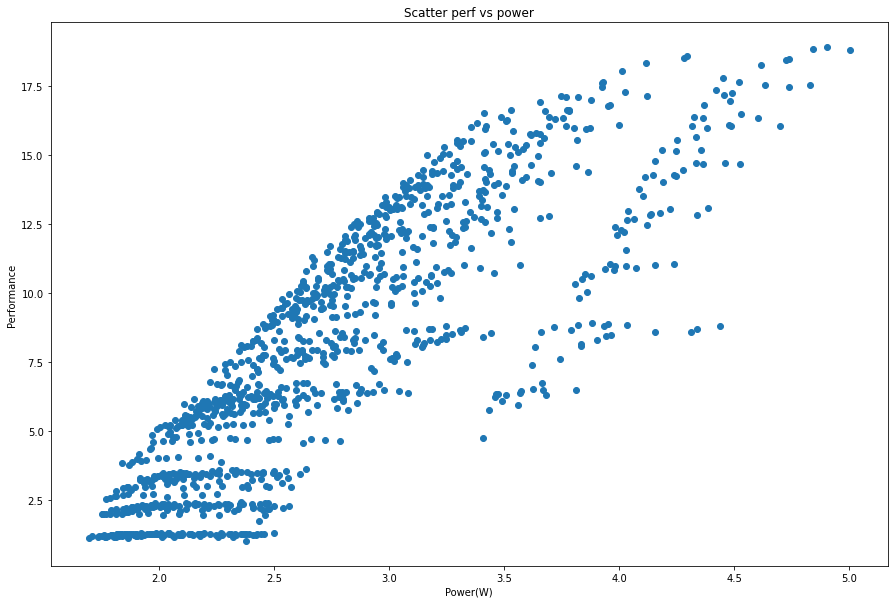

In [130]:
# plt.figure()
plt.subplots(figsize=(15,10))
plt.scatter(powD, perfD)
plt.title("Scatter perf vs power")
plt.xlabel("Power(W)")
plt.ylabel("Performance")
plt.show()

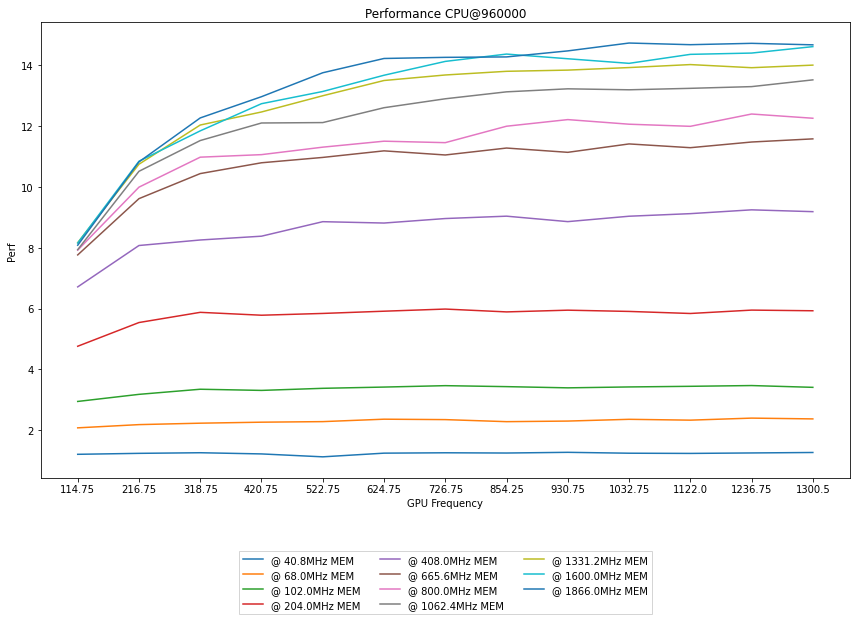

In [131]:
## Plot the impact of Mem, GPU, and CPU

#fixedCPU
cpu_f = cpu_list[4]

xs = gpu_freq_display_list
ys = []
ys_label = []
for j,mem_f in enumerate(mem_list):
    ytemp = []
    for gpu_f in gpu_list:
        ytemp.append(data[(cpu_f,mem_f,gpu_f)][0])
    ys.append(ytemp)
    ys_label.append("@ {}MHz MEM".format(mem_freq_display_list[j]))

    

fig = plt.figure(figsize=(12,8))
# figsize=(1,1)
ax = plt.subplot(111)
for i, y in enumerate(ys):
    ax.plot(range(len(xs)), y, label=ys_label[i])
plt.xticks(range(len(xs)), gpu_freq_display_list)
plt.title("Performance CPU@{}".format(cpu_f))
plt.xlabel("GPU Frequency")
plt.ylabel("Perf")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=False, shadow=False, ncol=3)
plt.tight_layout()
plt.show()




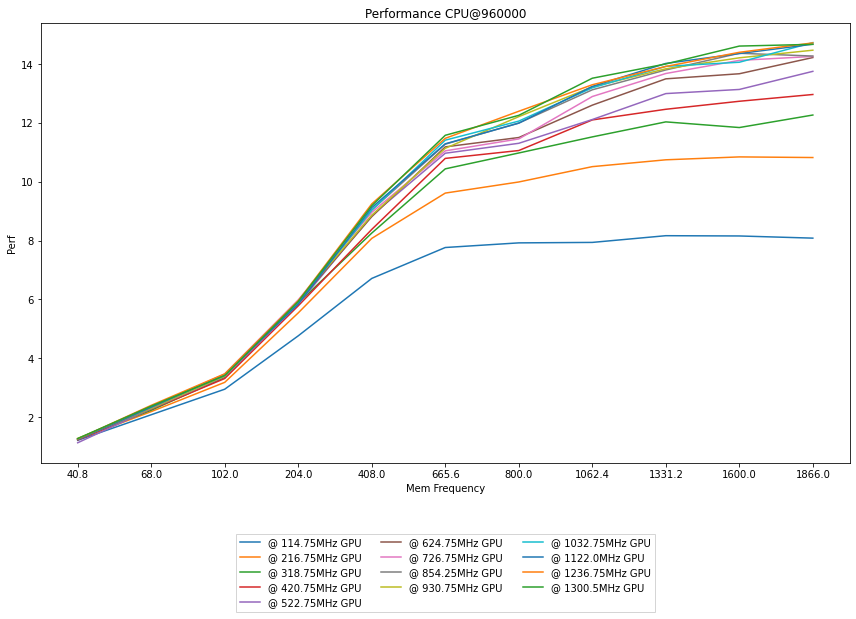

In [132]:
## Plot the impact of Mem, GPU, and CPU

#fixedCPU
cpu_f = cpu_list[4]

xs = mem_freq_display_list
ys = []
ys_label = []
for j,gpu_f in enumerate(gpu_list):
    ytemp = []
    for mem_f in mem_list:
        ytemp.append(data[(cpu_f,mem_f,gpu_f)][0])
    ys.append(ytemp)
    ys_label.append("@ {}MHz GPU".format(gpu_freq_display_list[j]))

    

fig = plt.figure(figsize=(12,8))
# figsize=(1,1)
ax = plt.subplot(111)
for i, y in enumerate(ys):
    ax.plot(range(len(xs)), y, label=ys_label[i])
plt.xticks(range(len(xs)), mem_freq_display_list)
plt.title("Performance CPU@{}".format(cpu_f))
plt.xlabel("Mem Frequency")
plt.ylabel("Perf")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=False, shadow=False, ncol=3)
plt.tight_layout()
plt.show()


In [258]:
# data = getCombinedData("./scripts/hsto_trails_1_results.csv","TegraHSTO")

# perfD = [data[key][0] for key in data.keys() ]
# powD = [data[key][1]/1000.0 for key in data.keys() ]

In [259]:
# # plt.figure()
# plt.subplots(figsize=(15,10))
# plt.scatter(powD, perfD)
# plt.title("Scatter perf vs power")
# plt.xlabel("Power(W)")
# plt.ylabel("Performance")
# plt.show()

In [260]:
# ## Plot the impact of Mem, GPU, and CPU

# #fixedCPU
# cpu_f = cpu_list[4]

# xs = gpu_freq_display_list
# ys = []
# ys_label = []
# for j,mem_f in enumerate(mem_list):
#     ytemp = []
#     for gpu_f in gpu_list:
#         ytemp.append(data[(cpu_f,mem_f,gpu_f)][0])
#     ys.append(ytemp)
#     ys_label.append("@ {}MHz MEM".format(mem_freq_display_list[j]))

    

# fig = plt.figure(figsize=(12,8))
# # figsize=(1,1)
# ax = plt.subplot(111)
# for i, y in enumerate(ys):
#     ax.plot(range(len(xs)), y, label=ys_label[i])
# plt.xticks(range(len(xs)), gpu_freq_display_list)
# plt.title("Performance CPU@{}".format(cpu_f))
# plt.xlabel("GPU Frequency")
# plt.ylabel("Perf")
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                 box.width, box.height * 0.9])
    
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#         fancybox=False, shadow=False, ncol=3)
# plt.tight_layout()
# plt.show()


In [261]:
# ## Plot the impact of Mem, GPU, and CPU

# #fixedCPU
# cpu_f = cpu_list[4]

# xs = mem_freq_display_list
# ys = []
# ys_label = []
# for j,gpu_f in enumerate(gpu_list):
#     ytemp = []
#     for mem_f in mem_list:
#         ytemp.append(data[(cpu_f,mem_f,gpu_f)][0])
#     ys.append(ytemp)
#     ys_label.append("@ {}MHz GPU".format(gpu_freq_display_list[j]))

    

# fig = plt.figure(figsize=(12,8))
# # figsize=(1,1)
# ax = plt.subplot(111)
# for i, y in enumerate(ys):
#     ax.plot(range(len(xs)), y, label=ys_label[i])
# plt.xticks(range(len(xs)), mem_freq_display_list)
# plt.title("Performance CPU@{}".format(cpu_f))
# plt.xlabel("Mem Frequency")
# plt.ylabel("Perf")
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                 box.width, box.height * 0.9])
    
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#         fancybox=False, shadow=False, ncol=3)
# plt.tight_layout()
# plt.show()

# Plot the Frequency HeatMap

In [187]:
PlotData

{(345600, 40800000, 114750000): (1.0, 2375.7736625514403),
 (345600, 68000000, 114750000): (1.7141737528900036, 2434.276836158192),
 (345600, 102000000, 114750000): (2.3821815607471546, 2472.6296296296296),
 (345600, 204000000, 114750000): (3.4844671021188467, 2446.686868686869),
 (345600, 408000000, 114750000): (4.351770791882212, 1959),
 (345600, 665600000, 114750000): (4.614345991561182, 2054.037037037037),
 (345600, 800000000, 114750000): (4.6007572570466975, 2134),
 (345600, 1062400000, 114750000): (4.668018354497919, 2228.1875),
 (345600, 1331200000, 114750000): (4.700118190609219, 2327.8481012658226),
 (345600, 1600000000, 114750000): (4.678002352689552, 2718.4),
 (345600, 1866000000, 114750000): (4.738301559792028, 3409.3924050632913),
 (345600, 40800000, 216750000): (1.0978541849667462, 1692.4716981132076),
 (345600, 68000000, 216750000): (1.9959846687351706, 1755.3393939393939),
 (345600, 102000000, 216750000): (2.5425167102586457, 1769.5693430656934),
 (345600, 204000000, 21

In [244]:
CPU_FREQ_COL = "CPU Frequencies"
GPU_FREQ_COL = "GPU Frequencies"
MEM_FREQ_COL = "Mem Frequencies"
TOT_SCORE = "Total Score"
TOT_POW = "Power"


In [245]:
column_names=[CPU_FREQ_COL,MEM_FREQ_COL,GPU_FREQ_COL,TOT_SCORE,TOT_POW]

In [246]:
plot_df=pd.DataFrame(columns=column_names)

In [247]:
for key in PlotData.keys():
    val = PlotData[key]
    plot_df.loc[len(plot_df.index)] = [key[0],key[1],key[2],val[0],val[1]]
    

In [248]:
plot_df

,CPU Frequencies,Mem Frequencies,GPU Frequencies,Total Score,Power
0,345600.0,4.080000e+07,1.147500e+08,1.000000,2375.773663
1,345600.0,6.800000e+07,1.147500e+08,1.714174,2434.276836
2,345600.0,1.020000e+08,1.147500e+08,2.382182,2472.629630
3,345600.0,2.040000e+08,1.147500e+08,3.484467,2446.686869
4,345600.0,4.080000e+08,1.147500e+08,4.351771,1959.000000
...,...,...,...,...,...
1139,1420800.0,8.000000e+08,1.300500e+09,14.630100,3617.000000
1140,1420800.0,1.062400e+09,1.300500e+09,15.988304,3804.120000
1141,1420800.0,1.331200e+09,1.300500e+09,17.469649,3926.772727
1142,1420800.0,1.600000e+09,1.300500e+09,18.606550,4295.809524


In [249]:
nu = 0.6
PDP = "PDP_"+str(nu)
plot_df[PDP] = pow(plot_df[TOT_SCORE],nu)*1000/plot_df[TOT_POW]

In [250]:
plot_df

,CPU Frequencies,Mem Frequencies,GPU Frequencies,Total Score,Power,PDP_0.6
0,345600.0,4.080000e+07,1.147500e+08,1.000000,2375.773663,0.420916
1,345600.0,6.800000e+07,1.147500e+08,1.714174,2434.276836,0.567627
2,345600.0,1.020000e+08,1.147500e+08,2.382182,2472.629630,0.680810
3,345600.0,2.040000e+08,1.147500e+08,3.484467,2446.686869,0.864377
4,345600.0,4.080000e+08,1.147500e+08,4.351771,1959.000000,1.233574
...,...,...,...,...,...,...
1139,1420800.0,8.000000e+08,1.300500e+09,14.630100,3617.000000,1.382929
1140,1420800.0,1.062400e+09,1.300500e+09,15.988304,3804.120000,1.386843
1141,1420800.0,1.331200e+09,1.300500e+09,17.469649,3926.772727,1.416885
1142,1420800.0,1.600000e+09,1.300500e+09,18.606550,4295.809524,1.345100


In [251]:
sort_df = plot_df.sort_values(by=[PDP], ascending=False)
MYVAL = PDP


In [252]:
sort_df

,CPU Frequencies,Mem Frequencies,GPU Frequencies,Total Score,Power,PDP_0.6
742,1113600.0,6.656000e+08,3.187500e+08,11.315054,2665.257143,1.608625
789,1113600.0,1.331200e+09,7.267500e+08,14.985954,3162.846154,1.604474
776,1113600.0,8.000000e+08,6.247500e+08,12.617248,2858.193548,1.601353
907,1267200.0,6.656000e+08,5.227500e+08,12.402608,2831.343750,1.599982
765,1113600.0,8.000000e+08,5.227500e+08,12.498286,2846.870968,1.598610
...,...,...,...,...,...,...
220,499200.0,4.080000e+07,8.542500e+08,1.231705,2421.252964,0.468019
990,1267200.0,4.080000e+07,1.300500e+09,1.257409,2455.048193,0.467332
1122,1420800.0,4.080000e+07,1.236750e+09,1.243893,2440.742857,0.467033
1133,1420800.0,4.080000e+07,1.300500e+09,1.293818,2499.598361,0.466932


In [253]:
tot_freq = [cpu_list,mem_list]
tot_idx = [CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL]
val_idx = [CPU_FREQ_COL,GPU_FREQ_COL,MEM_FREQ_COL,MYVAL]
comp_idx=[CPU_FREQ_COL,MEM_FREQ_COL]

In [254]:
complete_set = set()

In [255]:
for i in range(len(cpu_list)):
    for j in range(len(mem_list)):
        midx = sort_df[ (sort_df[CPU_FREQ_COL] == cpu_list[i])].index.to_list()
#             print(len(midx))
        gidx = sort_df[ (sort_df[MEM_FREQ_COL] == mem_list[j])].index.to_list()
        lidx = sort_df[ (sort_df[CPU_FREQ_COL] == cpu_list[i]) & (sort_df[MEM_FREQ_COL] == mem_list[j])  ].index[0]
        gpuval = gidx.index(lidx)
        memval = midx.index(lidx)
#             print(gpuval,memval)
        dfVal = plot_df.iloc[lidx][val_idx].to_list()
        dfVal = list(dfVal)
#             dfVal = dfVal.append(min(gpuval,memval))
#             dfVal.append(10-min(min(gpuval,memval),10))
        val = tuple(dfVal)
#             print(val)
        complete_set.add(val)
#             print(val) Commented code for heatmap
#             if cpu_list[i] not in complete_set:
#                 complete_set[cpu_list[i]] = {}
#             complete_set[cpu_list[i]][mem_list[j]] = val[3]

In [264]:
from matplotlib.patches import Ellipse
def myPlotScatter(comp_set):
    # Assuming a dictionary
    X_list = []
    Y_list = []
    Z_list = []
    for val in comp_set:
#         print(val)
        X_list.append(val[0]/1000000.0)
        Y_list.append(val[2]/1000000000.0)
        Z_list.append(val[3]*4)
        
    plt.figure(figsize=(10, 10))
    sc = plt.scatter(X_list,Y_list,c=Z_list)
#     fig = plt.figure(figsize=(12,12))
    cbar = plt.colorbar(sc)
    cbar.ax.set_ylabel("PPR")
    plt.xlabel("CPU Frequency(GHz)")
    plt.ylabel("Mem Frequency(GHz)")
    plt.title('')
    ax = plt.gca()
#     ax.add_patch(Ellipse((0.99, 0.55,30),width=0.35,height=1.6,angle=-75,
#                      edgecolor='b',linestyle='--',
#                      facecolor='none',
#                      linewidth=1))
#     plt.savefig("PPR_CM.svg")
    plt.show()

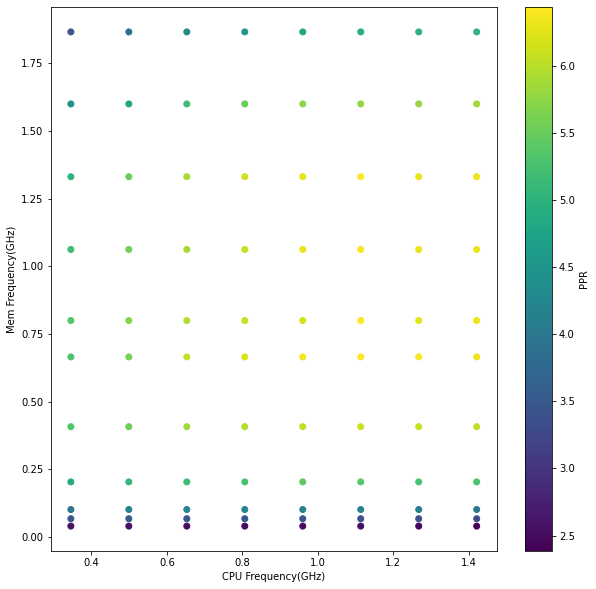

In [265]:
myPlotScatter(complete_set)